# Ex2 - Getting and Knowing your Data

This time we are going to pull data directly from the internet.
Special thanks to: https://github.com/justmarkham for sharing the dataset and materials.

### Step 1. Import the necessary libraries

In [21]:
#!/usr/bin/env python3
 
##########################################################
# Copyright (c) Jesper Vang <jesper_vang@me.com>         #
# Created on 22 Jul 2021                                 #
# Version:	0.0.1                                        #
# What: ? 						                         #
##########################################################

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams["figure.figsize"] = (10, 8)




### Step 2. Import the dataset from this [address](https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv). 

In [22]:

url="https://raw.githubusercontent.com/justmarkham/DAT8/master/data/chipotle.tsv"
df=pd.read_csv(url ,sep='\t')
df.head(5)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98


### Step 3. Assign it to a variable called chipo.

In [23]:
chipo = df

### Step 4. See the first 10 entries

In [24]:
chipo.head(10)

,order_id,quantity,item_name,choice_description,item_price
0,1,1,Chips and Fresh Tomato Salsa,NaN,$2.39
1,1,1,Izze,[Clementine],$3.39
2,1,1,Nantucket Nectar,[Apple],$3.39
3,1,1,Chips and Tomatillo-Green Chili Salsa,NaN,$2.39
4,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans...",$16.98
5,3,1,Chicken Bowl,"[Fresh Tomato Salsa (Mild), [Rice, Cheese, Sou...",$10.98
6,3,1,Side of Chips,NaN,$1.69
7,4,1,Steak Burrito,"[Tomatillo Red Chili Salsa, [Fajita Vegetables...",$11.75
8,4,1,Steak Soft Tacos,"[Tomatillo Green Chili Salsa, [Pinto Beans, Ch...",$9.25
9,5,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Pinto...",$9.25


### Step 5. What is the number of observations in the dataset?

In [25]:
# Solution 1
print(f"the shape of the data is {chipo.shape} rows X columns")

the shape of the data is (4622, 5) rows X columns


In [26]:
# Solution 2
chipo.info() # entries <= 4622 observations 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4622 entries, 0 to 4621
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   order_id            4622 non-null   int64 
 1   quantity            4622 non-null   int64 
 2   item_name           4622 non-null   object
 3   choice_description  3376 non-null   object
 4   item_price          4622 non-null   object
dtypes: int64(2), object(3)
memory usage: 180.7+ KB


### Step 6. What is the number of columns in the dataset?

In [27]:
print(f"Number of columns in the df {chipo.shape[1]}")

Number of columns in the df 5


### Step 7. Print the name of all the columns.

In [28]:
list(chipo.columns)


['order_id', 'quantity', 'item_name', 'choice_description', 'item_price']

### Step 8. How is the dataset indexed?

In [29]:
chipo.index

RangeIndex(start=0, stop=4622, step=1)

### Step 9. Which was the most-ordered item? 


<AxesSubplot:xlabel='item_name,quantity'>

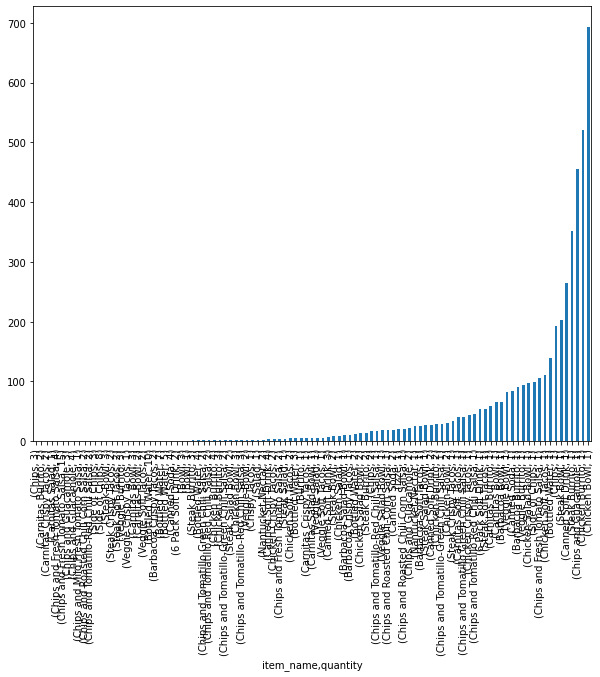

In [30]:

items = chipo.groupby(['item_name'])
items['quantity'].value_counts().sort_values().plot.bar()
#Based on the quantity of the item name Chicken Bowl was the most-ordered

### Step 10. For the most-ordered item, how many items were ordered?

In [31]:
(
chipo.groupby('item_name')
    .sum('quantity')
    .sort_values(['quantity'], ascending=False)
    .head(1)
)



,order_id,quantity
item_name,,
Chicken Bowl,713926,761


### Step 11. What was the most ordered item in the choice_description column?

In [32]:
(
chipo.groupby('choice_description')
    .sum()
    .sort_values(['quantity'], ascending=False)
    .head(1)
)


,order_id,quantity
choice_description,,
[Diet Coke],123455,159


### Step 12. How many items were orderd in total?

In [33]:
chipo.quantity.sum()


4972

### Step 13. Turn the item price into a float

- Step 13.a. Check the item price type
- Step 13.b. Create a lambda function and change the type of item price
- Step 13.c. Check the item price type

In [34]:
print(chipo.item_price.dtype)
chipo['item_price'] = (
    chipo['item_price']
    .map(lambda x: x.lstrip('$')).astype(float)
)
assert(chipo.item_price.dtype == 'float')

object


### Step 14. How much was the revenue for the period in the dataset?

In [35]:
chipo['revenue'] = (chipo['quantity']* chipo['item_price'])
total_revenue = chipo['revenue'].sum()

print(f"Total revenue for the period: ${total_revenue:.01f}")

Total revenue for the period: $39237.0


### Step 15. How many orders were made in the period?

In [36]:
print(f"Total nr. of orders made in ther period: {chipo['order_id'].value_counts().count()}")

Total nr. of orders made in ther period: 1834


### Step 16. What is the average revenue amount per order?

In [37]:
# Solution 1
chipo.groupby(['order_id']).sum().mean()
print(chipo.groupby(['order_id']).sum().mean())


quantity       2.711014
item_price    18.811429
revenue       21.394231
dtype: float64


In [38]:
# Solution 2



### Step 17. How many different items are sold?

In [39]:

count = sum(1 for _ in chipo['item_name'].unique())
print(f"There are {count} unique items on the menu")

There are 50 unique items on the menu


In [40]:
chipo["item_name"].nunique() # pandas one-liner 



50